In [2]:
import pandas as pan
import numpy as num
import requests
import matplotlib.pyplot as plt
from datetime import datetime
pan.set_option('expand_frame_repr', False)  

gasavgprice=pan.read_csv("./export-AvgGasPrice.csv")
df = pan.DataFrame(gasavgprice)
df['Date(UTC)'] = pan.to_datetime(df['Date(UTC)'])
df.set_index('Date(UTC)', inplace=True)

In [3]:
gaspertx=158000
treesize=10000
maxtxperyear=10000000
txxday=maxtxperyear/treesize/365
gasxday=maxtxperyear/treesize/365*gaspertx
gasxday=round(gasxday)
print(gasxday)


432877


In [4]:
df['Gwei'] = round(df['Value (Wei)'] / 1000000000)
df['MATIC Cost'] = (df['Gwei'] / 100000000) * gasxday
df['TX x day']=txxday

df=df.sort_index(ascending=False)
df

,UnixTimeStamp,Value (Wei),Gwei,MATIC Cost,TX x day
Date(UTC),,,,,
2021-06-16,1623801600,39118080107,39.0,0.168822,2.739726
2021-06-15,1623715200,7779304438,8.0,0.034630,2.739726
2021-06-14,1623628800,7498503762,7.0,0.030301,2.739726
2021-06-13,1623542400,5710134359,6.0,0.025973,2.739726
2021-06-12,1623456000,5869474858,6.0,0.025973,2.739726
...,...,...,...,...,...
2020-09-02,1599004800,5282834712,5.0,0.021644,2.739726
2020-09-01,1598918400,15235637553,15.0,0.064932,2.739726
2020-08-31,1598832000,7217276227,7.0,0.030301,2.739726


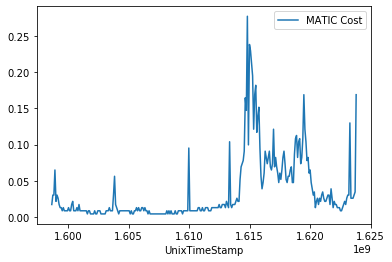

In [5]:
df.plot(x ='UnixTimeStamp', y='MATIC Cost')

In [27]:
    url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=MATIC&tsym=USD&limit=360'
    response = requests.get(url)   
    
    data = response.json()['Data']['Data'] 

In [28]:
    prices = pan.DataFrame(data)
    prices['time'] = pan.to_datetime(prices['time'], unit='s')
    prices.set_index('time', inplace=True)
    prices = prices.sort_index(ascending=False)
    prices

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-06-18,1.51400,1.40600,1.50400,1.645350e+07,2.396607e+07,1.40900,direct,
2021-06-17,1.55700,1.45600,1.47800,4.013349e+07,6.038683e+07,1.50400,direct,
2021-06-16,1.63800,1.44700,1.63000,5.819524e+07,9.000699e+07,1.47800,direct,
2021-06-15,1.70900,1.53400,1.55000,6.321882e+07,1.040361e+08,1.63000,direct,
2021-06-14,1.59900,1.41400,1.46700,4.910752e+07,7.407078e+07,1.55000,direct,
...,...,...,...,...,...,...,...,...
2020-06-27,0.02081,0.01891,0.02079,2.608891e+08,5.075707e+06,0.01946,multiply,BTC
2020-06-26,0.02170,0.02061,0.02162,2.007752e+08,4.173878e+06,0.02079,multiply,BTC
2020-06-25,0.02236,0.02144,0.02240,1.515716e+08,3.277689e+06,0.02162,multiply,BTC


In [29]:
mergedDf = df.merge(prices, left_index=True, right_index=True)
mergedDf = mergedDf.sort_index(ascending=False)

In [30]:
mergedDf['u$s'] = mergedDf['MATIC Cost'] * mergedDf['close']
mergedDf['u$s'].sum()
mergedDf.head(200)


,UnixTimeStamp,Value (Wei),Gwei,MATIC Cost,TX x day,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,u$s
2021-06-16,1623801600,39118080107,39.0,0.168822,2.739726,1.63800,1.44700,1.63000,58195235.87,9.000699e+07,1.47800,direct,,0.249519
2021-06-15,1623715200,7779304438,8.0,0.034630,2.739726,1.70900,1.53400,1.55000,63218820.87,1.040361e+08,1.63000,direct,,0.056447
2021-06-14,1623628800,7498503762,7.0,0.030301,2.739726,1.59900,1.41400,1.46700,49107524.95,7.407078e+07,1.55000,direct,,0.046967
2021-06-13,1623542400,5710134359,6.0,0.025973,2.739726,1.49200,1.31300,1.33900,53633812.17,7.481744e+07,1.46700,direct,,0.038102
2021-06-12,1623456000,5869474858,6.0,0.025973,2.739726,1.39500,1.16000,1.25000,70953652.43,9.020095e+07,1.33900,direct,,0.034777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-03,1606953600,1094381531,1.0,0.004329,2.739726,0.02102,0.01899,0.01943,931546.39,1.890079e+04,0.02058,direct,,0.000089
2020-12-02,1606867200,1103649480,1.0,0.004329,2.739726,0.01950,0.01851,0.01893,195312.65,3.733410e+03,0.01943,direct,,0.000084
2020-12-01,1606780800,1382461384,1.0,0.004329,2.739726,0.02000,0.01800,0.01944,922540.60,1.766022e+04,0.01893,direct,,0.000082
2020-11-30,1606694400,1659360506,2.0,0.008658,2.739726,0.01973,0.01854,0.01898,666960.86,1.288450e+04,0.01944,direct,,0.000168


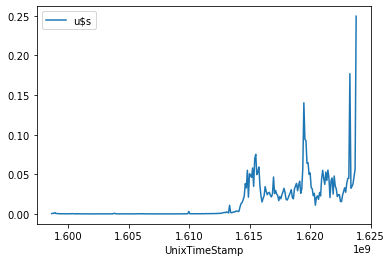

In [31]:
mergedDf.plot(x ='UnixTimeStamp', y='u$s')

In [32]:
mergedDf['u$s'].sum()

4.4097728878036

In [33]:
mergedDf


,UnixTimeStamp,Value (Wei),Gwei,MATIC Cost,TX x day,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,u$s
2021-06-16,1623801600,39118080107,39.0,0.168822,2.739726,1.63800,1.44700,1.63000,58195235.87,9.000699e+07,1.47800,direct,,0.249519
2021-06-15,1623715200,7779304438,8.0,0.034630,2.739726,1.70900,1.53400,1.55000,63218820.87,1.040361e+08,1.63000,direct,,0.056447
2021-06-14,1623628800,7498503762,7.0,0.030301,2.739726,1.59900,1.41400,1.46700,49107524.95,7.407078e+07,1.55000,direct,,0.046967
2021-06-13,1623542400,5710134359,6.0,0.025973,2.739726,1.49200,1.31300,1.33900,53633812.17,7.481744e+07,1.46700,direct,,0.038102
2021-06-12,1623456000,5869474858,6.0,0.025973,2.739726,1.39500,1.16000,1.25000,70953652.43,9.020095e+07,1.33900,direct,,0.034777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-02,1599004800,5282834712,5.0,0.021644,2.739726,0.02650,0.02214,0.02589,1030816.82,2.549883e+04,0.02383,direct,,0.000516
2020-09-01,1598918400,15235637553,15.0,0.064932,2.739726,0.02702,0.02589,0.02691,1259118.11,3.314043e+04,0.02589,direct,,0.001681
2020-08-31,1598832000,7217276227,7.0,0.030301,2.739726,0.02769,0.02666,0.02769,211404.18,5.713920e+03,0.02691,direct,,0.000815
2020-08-30,1598745600,7164603393,7.0,0.030301,2.739726,0.02864,0.02756,0.02781,154571.50,4.345120e+03,0.02769,direct,,0.000839


In [34]:
df.to_csv('merge.csv', index = True)